# Формулировка задачи: необходимо предсказать исход футбольного матча, используя данные Премьер-лиги.</br> Предсказать нужно победу, поражение или ничью для домашней команды

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Z:/Projects/ML/MLCourse/csv/matches.csv")
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


In [3]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [4]:
k = [x for x in df['notes'] if not np.isnan(x)]
print(k)

[]


Поскольку столбец `notes` состоит только из `Nan`, его можно полностью удалить

In [5]:
if k == []:
    df = df.drop('notes', axis = 1)

Также удаляем стобец `Unnamed: 0`

In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,2024,Manchester City
1,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,2024,Manchester City
2,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,...,Mike Dean,Match Report,23,1,18.2,1,0,0,2024,Manchester City
3,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,2024,Manchester City
4,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,2024,Manchester City


In [8]:
shape = df.shape
print(shape)

(4788, 26)


Посмотрим на процент пропущенных значений и их общее количество

In [9]:
missing_values = df.isnull().sum().sum()
percent = missing_values / df.size * 100
print(percent, missing_values)

1.313379602853287 1635


Распределение классов в датасете

In [10]:
class_distribution = df['result'].value_counts()

print(class_distribution)

print(class_distribution.W / shape[0] * 100, 
      class_distribution.D / shape[0] * 100, 
      class_distribution.L / shape[0] * 100)

result
W    1895
L    1820
D    1073
Name: count, dtype: int64
39.578111946533 22.41019214703425 38.01169590643275


In [11]:
import matplotlib.pyplot as plt

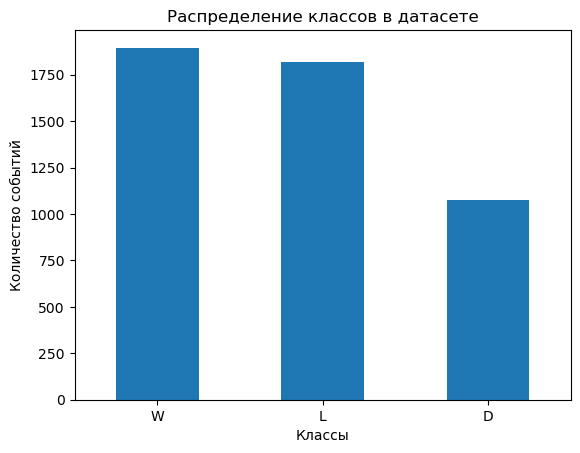

In [12]:
class_distribution.plot(kind='bar')
plt.title('Распределение классов в датасете')
plt.xlabel('Классы')
plt.ylabel('Количество событий')
plt.xticks(rotation=0)
plt.show()

Посчитаем общий процент выбросов

In [13]:
def calculate_iqr_and_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        outliers_count = outliers.count()
        
        total_count = column.count()
        outlier_percentage = (outliers_count / total_count) * 100 if total_count > 0 else 0
        
        return IQR, outliers_count, outlier_percentage
    
    return np.nan, np.nan, np.nan

total_outliers_count = 0
total_non_null_count = 0

for col in df.columns:
    class_distribution = df[col].value_counts()
    
    iqr_value, outliers_count, outlier_percentage = calculate_iqr_and_outliers(df[col])
    
    print(f"Столбец: {col}")
    
    if pd.api.types.is_numeric_dtype(df[col]):      
        print(f"IQR: {iqr_value:.2f}, Количество выбросов: {outliers_count}, Процент выбросов: {outlier_percentage:.2f}%")
        
        total_outliers_count += outliers_count
        total_non_null_count += df[col].count()
    
    else:
        print("Не числовой признак, игнорируем")
    
    print()


if total_non_null_count > 0:
    overall_outlier_percentage = (total_outliers_count / total_non_null_count) * 100
else:
    overall_outlier_percentage = 0

print(f"Общий процент выбросов: {overall_outlier_percentage:.2f}%")

Столбец: date
Не числовой признак, игнорируем

Столбец: time
Не числовой признак, игнорируем

Столбец: comp
Не числовой признак, игнорируем

Столбец: round
Не числовой признак, игнорируем

Столбец: day
Не числовой признак, игнорируем

Столбец: venue
Не числовой признак, игнорируем

Столбец: result
Не числовой признак, игнорируем

Столбец: gf
IQR: 2.00, Количество выбросов: 35, Процент выбросов: 0.73%

Столбец: ga
IQR: 2.00, Количество выбросов: 32, Процент выбросов: 0.67%

Столбец: opponent
Не числовой признак, игнорируем

Столбец: xg
IQR: 1.10, Количество выбросов: 76, Процент выбросов: 1.59%

Столбец: xga
IQR: 1.10, Количество выбросов: 82, Процент выбросов: 1.71%

Столбец: poss
IQR: 19.00, Количество выбросов: 0, Процент выбросов: 0.00%

Столбец: attendance
IQR: 27722.00, Количество выбросов: 0, Процент выбросов: 0.00%

Столбец: captain
Не числовой признак, игнорируем

Столбец: formation
Не числовой признак, игнорируем

Столбец: referee
Не числовой признак, игнорируем

Столбец: matc

## Визуализация данных

Посмотрим как влияет количество голов в ворота команды хозяев на результат игры</br>
Напоминание: W (победа) означет победу именно команды хозяев

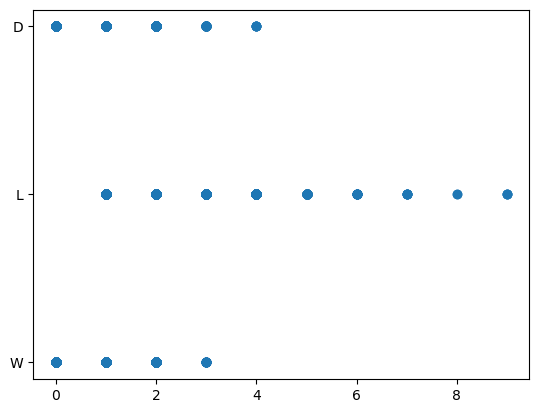

In [14]:
plt.scatter(df['ga'], df['result'])
pass

В целом, все логично, если нам не забили, проиграть мы вряд ли сможем<br/> 
Если нам забили больше 3 мячей, победы быть не может, выглядит странно, но допустим<br/> 
Но это мало о чем говорит на самом деле<br/> 
Попробуем посмотреть на матрицу корреляций, но перед этим чтобы отобразить в ней интресующие нас категориальные признаки, применим к `result` `one-hot-encoding`

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)

encoded_results = enc.fit_transform(df[['result']])

encoded_df = pd.DataFrame(encoded_results, columns=enc.get_feature_names_out(['result']))

df = pd.concat([df.drop(columns=['result']), encoded_df], axis=1)

Также преобразуем категориальные признаки названия команд в числовые

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['team'] = label_encoder.fit_transform(df['team'])
df['opponent'] = label_encoder.fit_transform(df['opponent'])

In [17]:
corr_matr = df.corr(numeric_only = True)

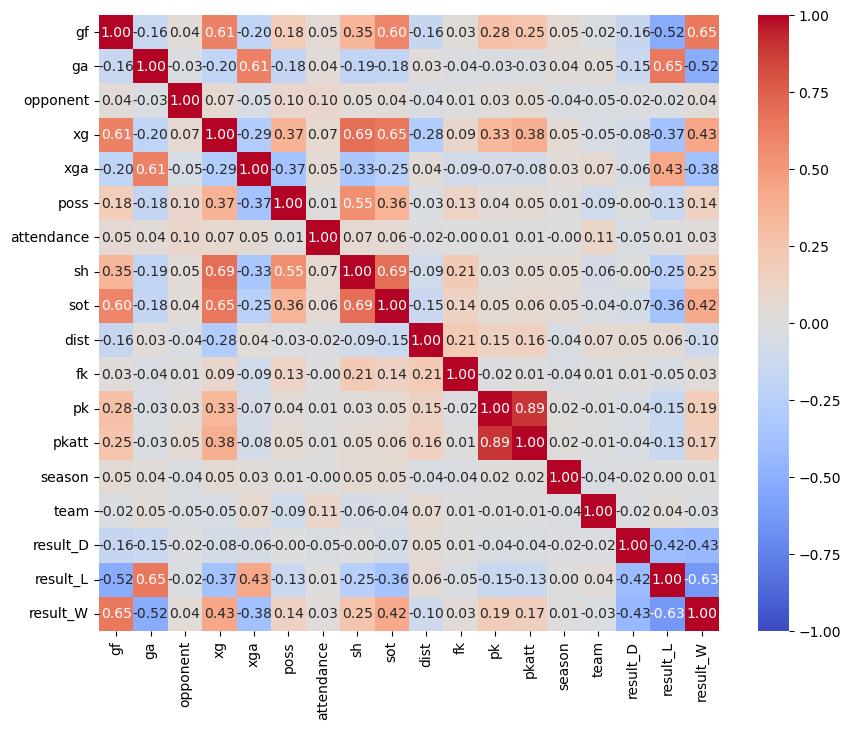

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matr, annot = True, fmt = '.2f', vmin = -1, vmax = 1, cmap = 'coolwarm')
pass

Стоит отметить, что матрица корреляций показывает лишь то, есть ли линейная зависимость между признаками или нет</br>
Если существует, например, квадратичная зависимость между признаками, то корреляция (как и ковариация) будет равна нулю</br>
Но если никакой зависимости нет, то корреляция снова будет равна нулю, чтобы понять, что на самом деле происходит нужно дополнительное исследование

Самая большая корреляция (нам нужна только победа) видна относительно количества ожидаемых голов команды хозяев и количество ударов по воротам команды оппонентов

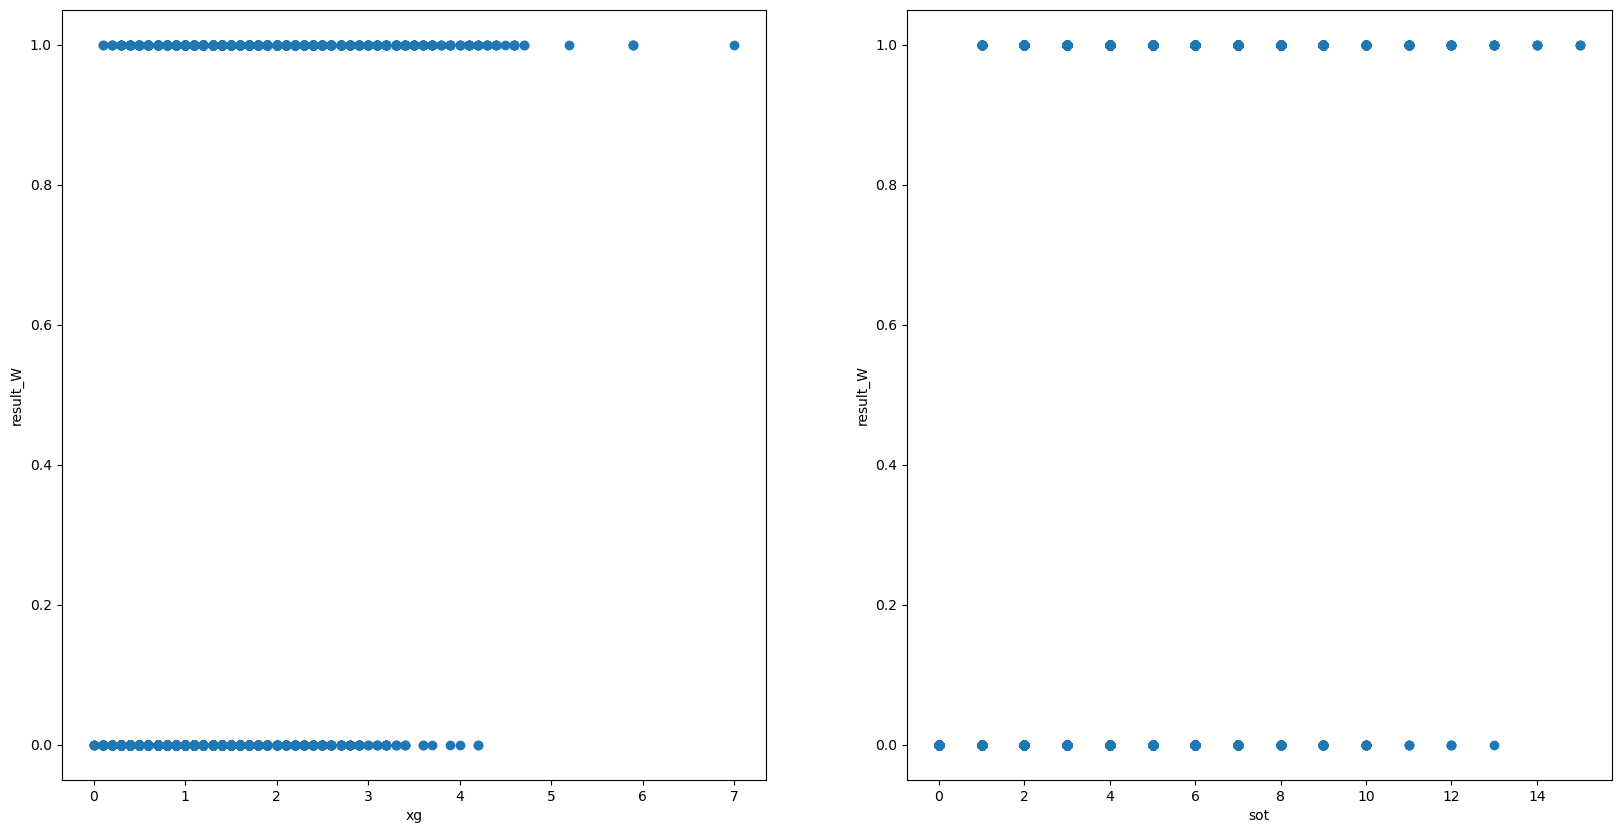

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df['xg'], df['result_W'])
plt.xlabel('xg')
plt.ylabel('result_W')
plt.subplot(1, 2, 2)
plt.scatter(df['sot'], df['result_W'])
plt.xlabel('sot')
plt.ylabel('result_W')
pass

Пока сложно делать какие-то выводы, поэтому идем дальше и разделим данные на обучающую и тестовую выборки

Не забудем заполнить пропущенные значения в `attendance` и `dist`

In [20]:
df.isnull().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
result_D           0
result_L           0
result_W           0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values = np.nan, strategy = 'median')

imp_num.fit(df[['attendance', 'dist']])

df[['attendance', 'dist']] = imp_num.transform(df[['attendance', 'dist']])

Проверяем

In [22]:
df.isnull().sum().sum()

0

In [23]:
df.describe()

,gf,ga,opponent,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season,team,result_D,result_L,result_W
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.00000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000
mean,1.447995,1.405388,12.003759,1.396512,1.364745,50.432957,37698.211571,12.619256,4.261278,17.356182,0.453216,0.118212,0.14599,2022.365079,12.039683,0.224102,0.380117,0.395781
std,1.312635,1.286927,7.600616,0.828847,0.814947,12.810958,14315.719491,5.548444,2.459963,3.048705,0.665250,0.342362,0.37937,1.461850,7.470721,0.417033,0.485466,0.489069
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.000000,0.800000,0.700000,41.000000,31194.000000,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,12.000000,1.300000,1.200000,51.000000,36347.000000,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000,12.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,19.000000,1.900000,1.800000,60.000000,41505.000000,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000,19.000000,0.000000,1.000000,1.000000
max,9.000000,9.000000,25.000000,7.000000,7.000000,82.000000,75546.000000,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000,25.000000,1.000000,1.000000,1.000000


In [24]:
print(df.dtypes)

date             object
time             object
comp             object
round            object
day              object
venue            object
gf                int64
ga                int64
opponent          int32
xg              float64
xga             float64
poss              int64
attendance      float64
captain          object
formation        object
referee          object
match report     object
sh                int64
sot               int64
dist            float64
fk                int64
pk                int64
pkatt             int64
season            int64
team              int32
result_D        float64
result_L        float64
result_W        float64
dtype: object


In [25]:
X = df.select_dtypes(include=['int64', 'float64'])
X = X.drop(columns=['result_W', 'result_D', 'result_L'])
y = df[['result_D', 'result_L', 'result_W']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Здесь не совсем уверен, но, возможно, есть смысл нормализовать столбцы `attendance` и `season`</br>
Поскольку в `attendance` довольно большие разброс и значения, есть вероятность, что предсказание будет зависеть только от этого столбца</br>
С `season` все довольно просто, в нашем случае он принимает только 4 значения - (2021, 2022, 2023, 2024)

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range=(0, 3))

X_train['attendance'] = scaler.fit_transform(X_train[['attendance']])
X_train['season'] = minmax_scaler.fit_transform(X_train[['season']])

In [28]:
X_train.describe()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,season
count,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3.591000e+03,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000
mean,1.429128,1.425787,1.384378,1.376441,50.299081,1.909423e-16,12.563631,4.249791,17.399025,0.460039,0.116681,0.147870,1.772139
std,1.302848,1.296876,0.829457,0.823943,12.899059,1.000139e+00,5.537947,2.471844,3.060720,0.670097,0.339634,0.382224,1.088669
min,0.000000,0.000000,0.000000,0.000000,18.000000,-2.513282e+00,0.000000,0.000000,5.900000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.800000,0.800000,41.000000,-4.546972e-01,8.000000,2.000000,15.400000,0.000000,0.000000,0.000000,0.750000
50%,1.000000,1.000000,1.200000,1.200000,50.000000,-8.564249e-02,12.000000,4.000000,17.300000,0.000000,0.000000,0.000000,2.250000
75%,2.000000,2.000000,1.900000,1.800000,60.000000,2.464820e-01,16.000000,6.000000,19.100000,1.000000,0.000000,0.000000,3.000000
max,9.000000,9.000000,7.000000,7.000000,82.000000,2.684936e+00,36.000000,15.000000,39.900000,4.000000,3.000000,3.000000,3.000000


Сделаем предсказание, используя KNN</br>
Выбор именно этого метода машинного обучения можно объяснить тем, что у нас пока нет четкого представления о распределении данных, а KNN может показывать хорошие результаты, так как он использует локальную информацию для принятия решений

Попробуем перебирать значение $k$

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    print(f"k == {k}")
    print(f'Точность на train: {accuracy_score(y_train, y_train_pred)}')
    print(f'Точность на  test: {accuracy_score(y_test, y_test_pred)}')

k == 1
Точность на train: 1.0
Точность на  test: 0.3483709273182957
k == 2
Точность на train: 0.7332219437482596
Точность на  test: 0.020885547201336674
k == 3
Точность на train: 0.858813700918964
Точность на  test: 0.4068504594820384
k == 4
Точность на train: 0.6811473127262601
Точность на  test: 0.19799498746867167
k == 5
Точность на train: 0.7897521581732108
Точность на  test: 0.4327485380116959
k == 6
Точность на train: 0.6505151768309663
Точность на  test: 0.2598162071846282
k == 7
Точность на train: 0.7379560011138958
Точность на  test: 0.4193817878028404
k == 8
Точность на train: 0.6318574213311056
Точность на  test: 0.2071846282372598
k == 9
Точность на train: 0.6992481203007519
Точность на  test: 0.38512949039264827
k == 10
Точность на train: 0.620718462823726
Точность на  test: 0.1035923141186299


Лучшая точность достигнута при $k=5$\
На тестовых данных точность хромает, что может свидетельствовать о недообучении</br>
Возможно, количество признаков слишком большое

In [30]:
X1 = df[['gf', 'ga', 'xg', 'sot']]
y1 = df[['result_D', 'result_L', 'result_W']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [31]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train1)
    y_train_pred = knn.predict(X_train1)
    y_test_pred = knn.predict(X_test1)
    print(f"k == {k}")
    print(f'Точность на train: {accuracy_score(y_train1, y_train_pred)}')
    print(f'Точность на  test: {accuracy_score(y_test1, y_test_pred)}')

k == 1
Точность на train: 1.0
Точность на  test: 1.0
k == 2
Точность на train: 0.9961013645224172
Точность на  test: 0.9958228905597326
k == 3
Точность на train: 0.9980506822612085
Точность на  test: 0.9983291562238931
k == 4
Точность на train: 0.9916457811194653
Точность на  test: 0.9949874686716792
k == 5
Точность на train: 0.9933166248955723
Точность на  test: 0.9958228905597326
k == 6
Точность на train: 0.9883040935672515
Точность на  test: 0.9891395154553049
k == 7
Точность на train: 0.9927596769702033
Точность на  test: 0.9916457811194653
k == 8
Точность на train: 0.9877471456418825
Точность на  test: 0.9883040935672515
k == 9
Точность на train: 0.9902534113060428
Точность на  test: 0.9908103592314118
k == 10
Точность на train: 0.984683932052353
Точность на  test: 0.985797827903091


Действительно, если взять данные, корреляция которых максимальна, результат будет намного лучше\
Точность в 100% при $k=1$ немного смущает (на самом деле, как и  при остальных $k$), скорее всего мы столкнулись с переобучением и нужно найти золотую середину

# Домашнее задание на 23.12.24

Будем использовать методы KMeans, DBSCAN и аггломеративную кластеризацю

In [32]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [55]:
Y = np.argmax(y, axis=1)

In [107]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_pred = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=1.81, min_samples=3)
dbscan_pred = dbscan.fit_predict(X)

agglo = AgglomerativeClustering(n_clusters=3)
agglo_pred = agglo.fit_predict(X)

print(np.unique(dbscan_pred))

[-1  0  1  2]


In [108]:
def eval(pred, name):
    ari = adjusted_rand_score(Y, pred)
    print(f"{name} ARI: {ari}")
    silhouette = silhouette_score(X, pred)
    print(f"{name} Silhouette Score: {silhouette}")

In [109]:
eval(kmeans_pred, "KMeans")
eval(agglo_pred, "Agglomerative clustering")
eval(dbscan_pred, "DBSCAN")

KMeans ARI: -0.002710493525123354
KMeans Silhouette Score: 0.7160544291718767
Agglomerative clustering ARI: -0.001366833526536927
Agglomerative clustering Silhouette Score: 0.6099746672763228
DBSCAN ARI: -6.986787556970435e-05
DBSCAN Silhouette Score: -0.527044000768695


### Вывод
Для всех трех методов мы получили adjusted random score равный $\sim$ $0$, что говорит о том, что алгоритмы не смогли правильно выделить кластеры.\
Silhouette score для алгоритмов KMeans и алггомеративной кластеризации больше $0.5$, что в целом неплохое значение, это означает, что большинство элементов были правильно отнесены к класетрам.\
Для DBSCAN очень трудно подобрать нужные параметры, чтобы получить точное число кластеров, при этом получив правильное разбиение.\
Очевидно, что для данной задачи не стоит использовать алгоритмы кластеризации